In [335]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [336]:
train = pd.read_csv("../data/data_train.csv")

X = train.drop(columns = ['SalePrice'])

In [337]:
train['Sale_Category'] = np.ceil(train['SalePrice']/50000)*50000

train['SaleCategory'] = np.where(train['Sale_Category'] == 50000, '0-100k', '')
train['SaleCategory'] = np.where(train['Sale_Category'] == 100000, '0-100k', train['SaleCategory'])
train['SaleCategory'] = np.where(train['Sale_Category'] == 150000, '100k-150k', train['SaleCategory'])
train['SaleCategory'] = np.where(train['Sale_Category'] == 200000, '150k-200k', train['SaleCategory'])
train['SaleCategory'] = np.where(train['Sale_Category'] == 250000, '200k-250k', train['SaleCategory'])
train['SaleCategory'] = np.where(train['Sale_Category'] == 300000, '250k-300k', train['SaleCategory'])
train['SaleCategory'] = np.where(train['Sale_Category'] > 300000, '>300k', train['SaleCategory'])

In [345]:
X_embedded = TSNE(n_components=3, learning_rate=100, perplexity=10).fit_transform(X)

xdf = pd.DataFrame(X_embedded)

xdf['Category'] = train['SaleCategory']

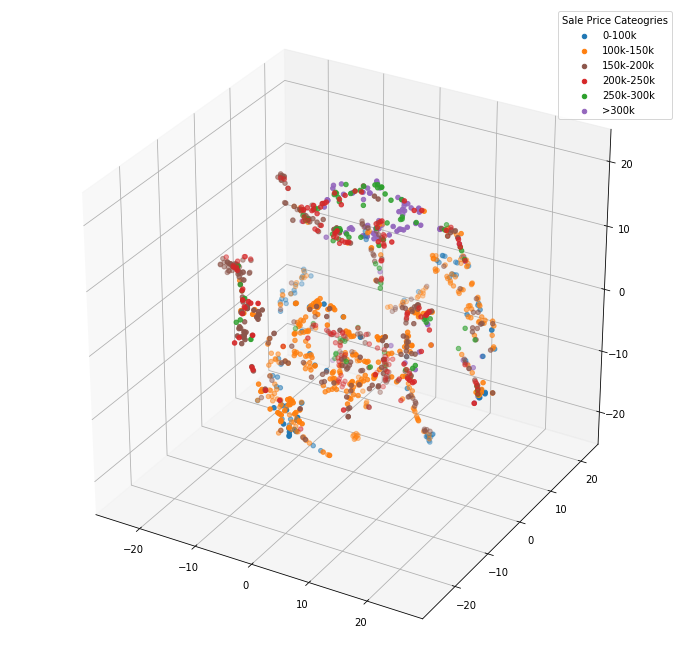

In [346]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

colors = {'0-100k':'tab:blue', '100k-150k':'tab:orange', '150k-200k':'tab:brown', 
          '200k-250k':'tab:red','250k-300k':'tab:green', '>300k':'tab:purple'}

for key, val in colors.items():
    data = xdf.loc[xdf['Category'] == key]
    ax.scatter(data[0], data[1], data[2], c=val, label = key)

ax.legend(title = 'Sale Price Cateogries')

plt.show()